In [1]:
from traitlets.config.manager import BaseJSONConfigManager
path = "C:\\Users\\adesouza\\.jupyter\\nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "linear",
              "transition": "zoom",
              "start_slideshow_at": "selected",
              "livereveal": {"autolaunch": True}
})
import warnings; warnings.simplefilter('ignore')

from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from mlxtend.plotting import plot_decision_regions

from sklearn.svm import SVC # "Support vector classifier"

import matplotlib.pyplot as plt
from seaborn import load_dataset

from sklearn import metrics
import seaborn as sb
import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
from mlxtend.feature_extraction import LinearDiscriminantAnalysis
from mlxtend.preprocessing import standardize
from mlxtend.data import iris_data

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier


  
# Machine Learning Algorithms for Data Science
## A Practical Approach

#### By Anthony Lorencette, BJ's Membership Analytics Team
<img src="bjs.png" width="23%" align="right">

   # Relevant ML Learning Algorithms

- Supervised Learning Algorithms
    - Support Vector Machines
    - Linear Regression 
    - Logistic Regression
    - Naive Bayes
    - Linear Discriminant Analysis
    - Decision Trees and Random Forest
    - K-Nearest Neighbors
    - Neural Networks

# Support Vector Machines
####  For Classification, Outlier Detection, or Regression

- The Support Vector Classifier algorithm finds classes of your data by finding a equidistant margin for all created classes (maximal margin). 

- Support Vector Machine is an extension of the support vector classifier in order to accommodate non-linear class boundaries. 
    - They are intended for the binary classification setting in which there are two classes.
    - For situations when more than 2 classes are needed, use one-vs-one or one-vs-all approach to generate *k* classes
<img src="svm1.png" width="45%" align="right"> 
<br><br>
- The SVM algorithm can also be used for regression: $f(x) = \langle w,x \rangle + b \hspace{1 ex}s.t.\hspace{1 ex} \chi,b \in \Re$ <img src="svm2.png" width="30%" align="right"> <br>
    - SVR seeks coefficients that minimize a different type of loss, where only residuals larger in absolute value than some positive constant contribute to the loss function 
    - The linear transformation is found in the image to the right. <br>
<br><br>
- Avantage: finds non apparent relationships in data which linear methods cannot see 
- Disadvantage: outperformed by gradient boosted trees, don't give class probabilities (as in ANN), and is rather cumbersome for multiclass problems (you need one model per class).

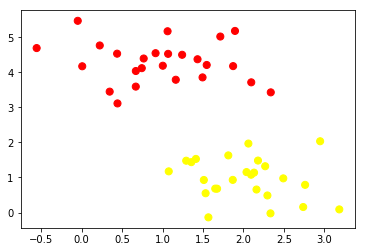

In [7]:
#Support vector machines example using python
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
a = plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

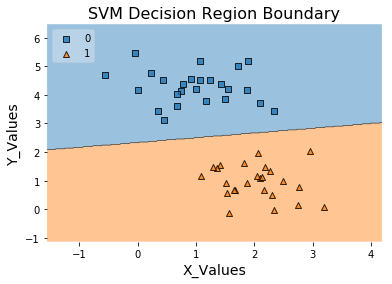

In [8]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
plot_decision_regions(X=X, y=y,clf=model, legend=2);
plt.xlabel("X_Values", size=14);
plt.ylabel("Y_Values", size=14);
plt.title('SVM Decision Region Boundary', size=16);

# Simple Linear Regression ML Algorithm
#### A Data Science Perspective

- Predicts a quantitative response Y on the basis of a single predictor variable X, assuming there exists an approximate linear r/n between X and Y
    - Algorithm: Generate least squares fit for reg of Y on X by minimizing RSS 

<br>
- Shrinkage models: Instead of just minimizing RSS, now use all possible model predictors using a technique that constrains, or regularizes the coefficient estimates/shrinks the coefficient estimates towrds 0. Overall, shrinking the coefficient estimates can significantly reduce variance  
    - Ridge Regression: add in shrinkage penalty to cost function, $\lambda \Sigma_{j=1}^{p}\beta_{j}^{2}$ which is small when coeffients are close to 0 and shrinks each $\beta_{j}$ towards 0. (inverse relationship). 
    - Lasso Regression: Advantage over ridge because it sets some of the coeffients to be exactly 0 when $\lambda$ is sufficiently large, performing variable selection during the optimization process. These models are easier to interpret and less cumbersome to compute than Ridge Regressions.
<img src="reg1.png" width="45%" align="right"> 


The ellipses that are centered aroundˆβ represent regions of constant
RSS. In other words, all of the points on a given ellipse share a common
value of the RSS. As the ellipses expand away from the least squares co-
efficient estimates, the RSS increases
. Equations (6.8) and (6.9) indicate
that the lasso and ridge regression coefficient estimates are given by the
first point at which an ellipse contacts the constraint region. Since ridge
regression has a circular constraint with no sharp points, this intersection
will not generally occur on an axis, an
d so the ridge regression coefficient
estimates will be exclusively non-zer
o. However, the lasso constraint has
corners
at each of the axes, and so the ellipse will often intersect the con-
straint region at an axis. When this occurs, one of the coefficients will equal
zero. In higher dimensions, many of the
coefficient estimates may equal zero
simultaneously. In Figure 6.7, the intersection occurs at
β
1
=0,andsothe
resulting model will only include
β
2
.

# Simple Linear Regression ML Algorithm
#### A Data Science Perspective


- Our objective function is captured in the *cost function* which is to $\text{min }\frac{1}{n}\Sigma_{i=1}^{n}(pred_{i}-y_{i})^{2} (1)$ where $pred_{i} = \beta_{k}^{'}$
- The method of minimzation most commonly used is called *Gradient Descent* (see below), which uses calculus to find the global minimum of the cost function (1) <img style="float: right;" src="LR1.png" width="20%">
    - $\frac{\partial J}{\partial \beta_{0}} = \frac{2}{n}\Sigma_{i=1}^{n}(\beta_{0}+\beta_{1}\cdot x_{i} - y_{i})\cdot x_{i} \Rightarrow \frac{\partial J}{\partial \beta_{0}} = \frac{2}{n}\Sigma_{i=1}^{n}(pred_{i}-y_{i})$
    - $\frac{\partial J}{\partial \beta_{1}} = \frac{2}{n}\Sigma_{i=1}^{n}(\beta_{0}+\beta_{1}\cdot x_{i} - y_{i})\cdot x_{i} \Rightarrow \frac{\partial J}{\partial \beta_{1}} = \frac{2}{n}\Sigma_{i=1}^{n}(pred_{i}-y_{i})\cdot x_{i}$
    

- Add in a *hyperparameter* ($\alpha$) to control learning rate (step size).
    - $a_{0} = a_{0} - \alpha \cdot \frac{2}{n}\Sigma_{i=1}^{n}(pred_{i}-y_{i})$
    - $a_{1} = a_{1} - \alpha \cdot \frac{2}{n}\Sigma_{i=1}^{n}(pred_{i}-y_{i}) \cdot x_{i}$
- Ridge Regression: Use when data is multicollinear (near linear relationship between vars): new cost function is $\text{min }\frac{1}{n}\Sigma_{i=1}^{n}(pred_{i}-y_{i})^{2} + \lambda\Sigma_{i=1}^{n}\beta_{k}^{2}$, use cv to tune $\lambda$ (*look up better normalization*)
- Lasso Regression: Corrects multicollinearity further by effectively deleting highly collinear parameters: new cost function is $\text{min }\frac{1}{n}\Sigma_{i=1}^{n}(pred_{i}-y_{i})^{2} + \lambda\Sigma_{i=1}^{n}|\beta_{k}|$
- Measure accuracy using $R^{2}$

Simply, the cost function says to take the difference between each real data point (y) and our model’s prediction (ŷ), square the differences to avoid negative numbers and penalise larger differences. Finally, add them up and take the average. Except rather than dividing it by n, we divide it by 2*n. This is because mathematicians have decided that it is easier to derive. 

For problems that are 2 dimensional, we can could simply derive the optimal beta parameters that minimise our loss function. However, as the model grows increasingly complex, computing the beta parameters for each variable becomes no longer feasible. As such, a method known as Gradient Descent will be necessary in allowing us to minimise our loss function.

To avoid overfit, use regularisation parameter: Add in a penalty in the loss function for building a model that assigns too much explanatory power to any one feature or allows to many features to be taken into account. New cost function becomes $\text{min }\frac{1}{n}\Sigma_{i=1}^{n}(pred_{i}-y_{i})^{2} + \lambda \Sigma_{i=0}^{1}\beta_{i}^{2}$

The lambda coefficient of the regularisation term in the cost function is a hyperparameter: a general setting of your model that can be increased or decreased (i.e. tuned) in order to improve performance. A higher lambda value harshly penalises large beta coefficients that could lead to potential overfitting. To decide on the best value of lambda (λ), you’d use a method known as cross-validation which involves holding our a portion of the training data during training, then seeing how well your model explains the held-out portion. We’ll go over this in more depth in future series'.

Multicollinearity, or collinearity, is the existence of near-linear relationships among the independent variables.
For example, suppose that the three ingredients of a mixture are studied by including their percentages of the
total. These variables will have the (perfect) linear relationship: P1 + P2 + P3 = 100. During regression
calculations, this relationship causes a division by zero which in turn causes the calculations to be aborted. When
the relationship is not exact, the division by zero does not occur and the calculations are not aborted. However,
the division by a very small quantity still distorts the results. Hence, one of the first steps in a regression analysis
is to determine if multicollinearity is a problem. Multicollinearity can create inaccurate estimates of the regression coefficients, inflate the standard errors of the regression coefficients, deflate the partial t-tests for the regression coefficients, give false, nonsignificant, pvalues, and degrade the predictability of the model (and that’s just for starters).

In [ ]:
#tips example

df = load_dataset('tips')
import pandas as pd
df.replace({ 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} ,inplace=True)

In [ ]:
X = df[['total_bill','sex','size','smoker']]
Y = df[['tip']]
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=26)
OLS = linear_model.LinearRegression()
OLS.fit(X_train, y_train)
OLSpredictions=OLS.predict(X_test) #print out parameters
sb.distplot(y_test-OLSpredictions)
plt.title("OLS: Predicted vs Actual Tips")
plt.show()
print("R^2 for LS Regression: ", '{:0.3f}'.format(abs(metrics.r2_score(y_test, OLSpredictions))))

In [ ]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
lpredictions=lasso.predict(X_test)
lpredictions = np.array(lpredictions).reshape((len(lpredictions), 1))
sb.distplot(y_test-lpredictions)
plt.title("Lasso: Predicted vs Actual Tips")
plt.show()
print("R^2 for Lasso Regression: ", '{:0.3f}'.format(abs(metrics.r2_score(y_test, lpredictions))))

In [ ]:
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
rpredictions=ridge.predict(X_test)
sb.distplot(y_test-rpredictions)
plt.title("Ridge: Predicted vs Actual Tips")
plt.show()
print("R^2 for Ridge Regression: ", '{:0.3f}'.format(abs(metrics.r2_score(y_test, rpredictions))))

#normalize it 

# Logistic Regression ML Algorithms
#### A Very Simple Classification Algorithm

- $p(X) = \beta_1 + \beta_0X $  
- $ p = (1 - p)*e^{\beta_0 + \beta_1X} $ 
- $ p = e^{\beta_0 + beta_1X} - p * e^{\beta_0 + \beta_1} $ 
- $p + p * e^{\beta_0 + \beta_1X} = e^{\beta_0 + \beta_1X} $
- $p *{1 + exp(\beta_0 + \beta_1X}) = e^{\beta_0 + \beta_1X}$
- $p = {e^{\beta_0 + \beta_1X}}/ (1 + e^{\beta_0 + \beta_1}X)$
- Logistic Regression is used for dependent variable that follows a binomial distribution (linear regression is used when the dependent variable is coninuous, and usually normally distributed)
    - Logistic Regression is used to model binary outcomes

Specificity/True Negative Rate = True Negative/(True Negative + False Positive) <br>
1- Specificity / False Positive Rate = False Positive / (True Negative + False Positive)
AOC finds area under curve for trade off <br>

avg precision 0.95 avg recall 0.95 avg f1-score 0.95


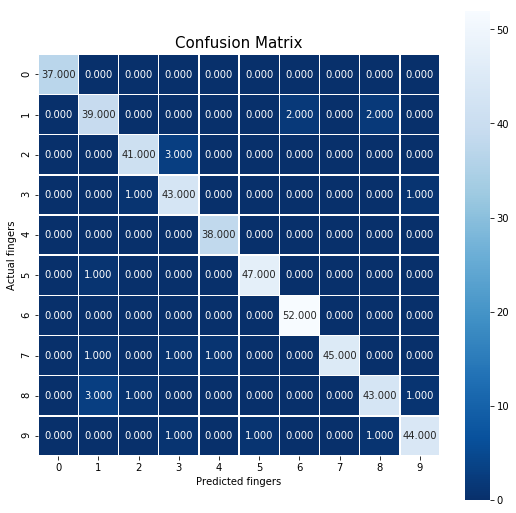

In [15]:
#image processing using logistic regression
logisticRegr = LogisticRegression()

digits = load_digits()
x_train2, x_test2, y_train2, y_test2 = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train2, y_train2)
logisticRegr.predict(x_test2[0].reshape(1,-1))
pred2 = logisticRegr.predict(x_test2);

cm = metrics.confusion_matrix(y_test2, pred2)
plt.figure(figsize=(9,9))
sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual fingers');
plt.xlabel('Predicted fingers');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);
#print(metrics.classification_report(y_test2,pred2))
print('avg precision',0.95,'avg recall',0.95,'avg f1-score',0.95)

# Naive Bayes
#### A Very Simple Classification 'Algorithm'

- Naive Bayes classifier calculates the probabilities for every factor. Then it selects the outcome with highest probability.
    - This classifier assumes the features are independent. We first calculate P(x1| E) , P(x2 | E) … and then select the test actor x with maximum probability value. Where $P(x1\hspace{1pt} |\hspace{1pt} E) = \frac{P(E\hspace{1pt} |\hspace{1pt} x1)\hspace{1pt}P(x1)}{P(E)}$
- The Gaussian Naive Bayes works for normally distributed features, Multinomial for descrete counts, Bernoulli for binary features.





             precision    recall  f1-score   support

          3       0.71      0.71      0.71         7
          4       0.60      0.60      0.60         5

avg / total       0.67      0.67      0.67        12



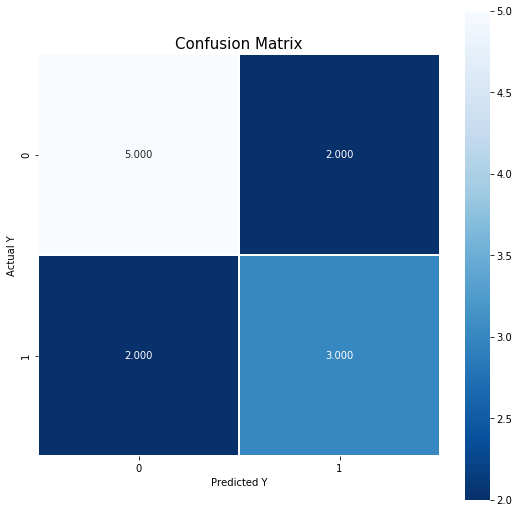

In [34]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

x3= np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
Y3 = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])
bayes = GaussianNB()
bayes.fit(x3, Y3)
pred3 = bayes.predict(x3);
cm = metrics.confusion_matrix(Y3, pred3)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Y');
plt.xlabel('Predicted Y');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);
print(metrics.classification_report(Y3,pred3))

# Linear Discriminant ML Algorithm
#### For More Advanced Classification/ Dimensionality Reduction Technique

- Often we work with a large set random variables that may be grouped into a smaller set of classes. We use dimensionality reduction techniques to improve computation time and have smaller data sets for training (in order to replicate statistical state-of-nature). 
- The goal of an LDA is to project a feature space (a dataset n-dimensional samples) onto a smaller subspace k (where k≤n−1) while maintaining the class-discriminatory information. LDA can also be helpful to avoid overfitting by minimizing the error in parameter estimation.
- Algorithm works through linear transformations to data 
<img src="lda_1.png" width="20%" align="right"> 


#svm vs lda

C:\Users\adesouza\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


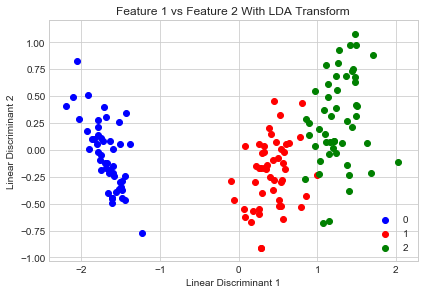

In [12]:
#n_discriminants = 2
X4, y4 = iris_data()
X4 = standardize(X4)
# y4 is 0 1 or 2
#plt.scatter(X4[y4 == lab, 0], X4[y4 == lab, 1],label=lab,c=col)
lda = LinearDiscriminantAnalysis(n_discriminants=2)
lda.fit(X4, y4)
X_lda = lda.transform(X4)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((0, 1, 2),
                        ('blue', 'red', 'green')):
        plt.scatter(X_lda[y4 == lab, 0],
                    X_lda[y4 == lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Linear Discriminant 1')
    plt.ylabel('Linear Discriminant 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.title("Feature 1 vs Feature 2 With LDA Transform")
    plt.show()
    #data science kung fu
    #neural net is correlation on crack 
    #monte carlo rn with ls

# Decision Tree Algorithm

- Decision trees are a non-parametric supervised learning method used for classification and regression.
- The goal of using decision trees is to create a training model that can be used to predict the value/class of a target variable by learning simple decision rules inferred from the training data.
    - The decision tree algorithm attempts to solve the problem by using **tree representation**
- As with other classifiers, DecisionTreeClassifier two arrays as input: an array X, sparse or dense, of size *(n_samples, n_features)* holding the training samples, and an array Y of integer values, size *(n_samples)*, holding the class labels for the training samples
- After the model is fitted, it can be used to predict the class of samples
    - The probability of each class can also be predicted, which is the fraction of training samples of the same class in a leaf
- Building Tree representation
    - Place most valuable attribute of dataset in the **root** of the tree
    - Split the training dataset into **subsets**
        - Subsets should be split such that each subset contains data with the same value for an attribute
    - Repeat steps above on each subset until you find **leaf nodes** in all the branches of the tree
    

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150



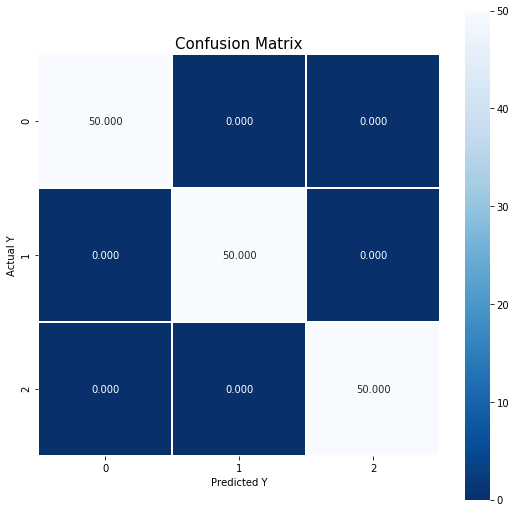

In [35]:
df6 = datasets.load_iris()
# fit a model to the data
dt = DecisionTreeClassifier()
dt.fit(df6.data, df6.target)
# make predictions
x6 = df6.target
pred6 = dt.predict(df6.data)
# summarize the fit of the model
print(metrics.classification_report(x6, pred6));
cm = metrics.confusion_matrix(x6, pred6);
plt.figure(figsize=(9,9))
sb.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Y');
plt.xlabel('Predicted Y');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);
plt.show()

# K-nearest Neighbor ML Algorithm

- Simple Classification Algorithm ("Lazy" and Non-parametric)
    - No explicit training phase (KNN does not use training points for generalization, keeps most of training data for test phase)
        - Almost all training data is stored
    - The model structure is determined from the data and the algorithm makes no assumption on the underlying data distribution
        - Useful for non-linear data
- The KNN algorithm is used both for classification and regression predictive problems but is more widely used for classification
- KNN algorithm is based on **feature similarity** i.e how closely out-of-sample features resemble the training set will determine how we classify a given data point
    -  An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors.
    - K is an int chosen by user
        -  A small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive
        - Simple approach to selecting k is to set k = sqrt(n) where n is num of classes
        - It should be as big that noises won't affect the prediction highly. And as low that one factor won't dominate another

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.96      0.94      0.95        50
          2       0.94      0.96      0.95        50

avg / total       0.97      0.97      0.97       150



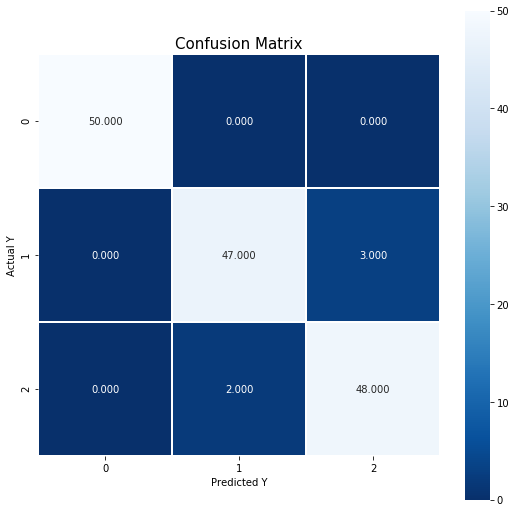

In [37]:
df7 = datasets.load_iris()
# fit a k-nearest neighbor model to the data
knn = KNeighborsClassifier()
knn.fit(df7.data, df7.target)
# make predictions
x7 = df7.target
pred7 = knn.predict(df7.data)
# summarize the fit of the model
print(metrics.classification_report(x7, pred7))
#Visualization
cm7 = metrics.confusion_matrix(x7, pred7);
plt.figure(figsize=(9,9))
sb.heatmap(cm6, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Y');
plt.xlabel('Predicted Y');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);
plt.show()

# Neural Networks
#### The King of Classification

- Neural networks are multilayered perceptron models of a (brain's) neural network.
    - Input layer: directly takes in features, weighed by activation function (1 input unit/feature = m)
    - Output layer: creates resulting outputs (n<m classes)
    - Middle layers: 1+ hidden layers which don't directly see inputs or outputs (length of neurons = m+1)
<img src="nn1.png" width="25%" align="right"> 
- Normalize data to allow for convergence ***
- Steps to train a neural network:
    - Randomly initialize weights using **Monte Carlo** random number generator
    - Use forward propogation (multiply units by weights and add bias) to get y_i for any feature x_i
    - Using calculated outputs, compute cost function 
    - Backpropogate to find error for predicted vs actual values
    - Use gradient descent to minimize cost function

             precision    recall  f1-score   support

          0       1.00      0.97      0.98        64
          1       0.98      1.00      0.99        79

avg / total       0.99      0.99      0.99       143



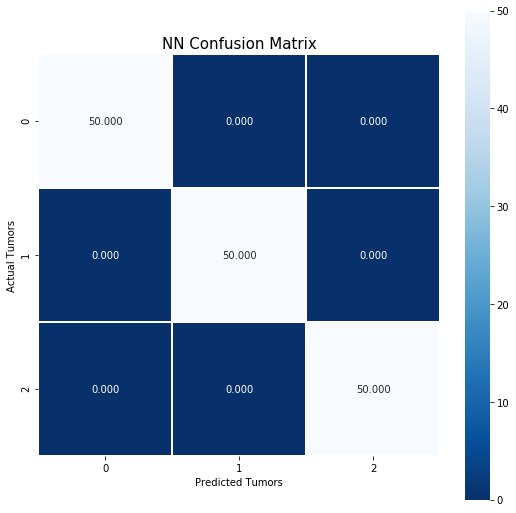

In [38]:
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier #Multi-Layer Perceptron Classifier model
cancer = load_breast_cancer()
#cancer.keys()
X5 = cancer['data']
y5 = cancer['target']
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5)
X_train5 = standardize(X_train5)
X_test5 = standardize(X_test5)
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30)) #3 layers with same number of neurons as there are features in df
mlp.fit(X_train5,y_train5); #alpha, beta, learning rate init, max iter all default
nnpredictions = mlp.predict(X_test5)
cm5 = metrics.confusion_matrix(y_test5,nnpredictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Tumors');
plt.xlabel('Predicted Tumors');
all_sample_title = 'NN Confusion Matrix'
plt.title(all_sample_title, size = 15);
print(metrics.classification_report(y_test5,nnpredictions))
#good features, but hard to interpret model

Biological neural networks have interconnected neurons with dendrites that receive inputs, then based on these inputs they produce an output signal through an axon to another neuron. The process of creating a neural network begins with the most basic form, a single perceptron.
perceptron
A perceptron has one or more inputs, a bias, an activation function, and a single output. The perceptron receives inputs, multiplies them by some weight, and then passes them into an activation function to produce an output. There are many possible activation functions to choose from, such as the logistic function, a trigonometric function, a step function etc. We also make sure to add a bias to the perceptron, this avoids issues where all inputs could be equal to zero (meaning no multiplicative weight would have an effect). 
Once we have the output we can compare it to a known label and adjust the weights accordingly (the weights usually start off with random initialization values). We keep repeating this process until we have reached a maximum number of allowed iterations, or an acceptable error rate.

To create a neural network, we simply begin to add layers of perceptrons together, creating a multi-layer perceptron model of a neural network. You'll have an input layer which directly takes in your feature inputs and an output layer which will create the resulting outputs. Any layers in between are known as hidden layers because they don't directly "see" the feature inputs or outputs. For a visualization of this check out the diagram below (source: Wikipedia).


